In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('cleaned_insurance_data_with_year.csv',index_col=0)

/home/ambuj/izenda_fullcycle/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
all_data.columns

Index(['LossYearMo', 'City', 'State', 'Zip', 'DivisionName', 'StartedFlag',
       'DisplayName', 'CommOrRes', 'NoteCount', 'PhotoCount', 'JobCount',
       'ClaimCount', 'EstimateTotal', 'LossMo', 'LossYear'],
      dtype='object')

In [4]:
all_data['NewEstimateTotal'] = np.where(all_data.EstimateTotal == 0,0,1)

In [5]:
all_data.drop(['City','Zip','LossYearMo','EstimateTotal'],axis=1,inplace=True)

In [6]:
# all_data.LossYear = all_data.LossYear.astype(str)
# all_data.LossMo = all_data.LossMo.astype(str)

In [7]:
# all_data.reset_index(drop=True,inplace=True)

In [8]:
all_data_processed = pd.get_dummies(all_data,sparse=True)

In [9]:
all_data_processed.shape

(1278568, 2791)

In [10]:
all_data_processed.rename(columns={'LossMo':'LossYearMo'},inplace=True)

In [11]:
def train_validate_split(df, train_percent=.80, validate_percent=.20, seed=42):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:]]
    return train, validate

In [12]:
test = all_data_processed[all_data_processed.LossYear == 2017]
tr_val = all_data_processed[all_data_processed.LossYear != 2017]
test.drop(['LossYear'],axis=1,inplace=True)
tr_val.drop(['LossYear'],axis=1,inplace=True)

/home/ambuj/izenda_fullcycle/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
tr, val = train_validate_split(tr_val.reset_index(drop=False))

In [14]:
tr.set_index('index',inplace=True)

In [15]:
val.set_index('index',inplace=True)

In [16]:
tr.shape, val.shape, test.shape

((691543, 2790), (172886, 2790), (414139, 2790))

In [17]:
tr.to_pickle('train_insurance_2017_new.pkl')

In [18]:
val.to_pickle('valid_insurance_2017_new.pkl')

In [19]:
test.to_pickle('test_insurance_2017_new.pkl')

# --------------------------------

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
all_data_train, all_data_test = train_test_split(all_data, test_size=0.2, random_state=42)

In [23]:
all_data_train, all_data_valid = train_test_split(all_data_train, test_size=0.25, random_state=42)

In [32]:
all_data_train.shape, all_data_valid.shape, all_data_test.shape

((767140, 12), (255714, 12), (255714, 12))

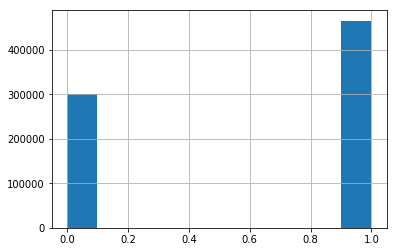

In [26]:
all_data_train.NewEstimateTotal.hist()

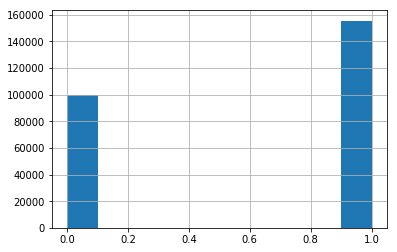

In [28]:
all_data_valid.NewEstimateTotal.hist()

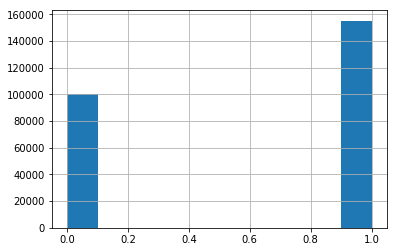

In [29]:
all_data_test.NewEstimateTotal.hist()